In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [4]:
import pandas as pd
import numpy as np
# import dtale
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
import streamlit as st

### Funnel Analysis

In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/fittlyf_assignment/WorkerFunnel.csv", parse_dates=['Date'])
df1

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01,Q1,Sewing,0.80,1920,56.0,NaN
...,...,...,...,...,...,...,...
1192,2015-11-03,Q2,Finishing,0.75,960,8.0,0.628333
1193,2015-11-03,Q2,Finishing,0.70,960,8.0,NaN
1194,2015-11-03,Q2,Finishing,0.65,960,8.0,0.625625
1195,2015-11-03,Q2,Finishing,0.75,1800,15.0,0.505889


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1197 non-null   datetime64[ns]
 1   Quarter                1197 non-null   object        
 2   Department             1197 non-null   object        
 3   Targeted Productivity  1197 non-null   float64       
 4   Overtime               1197 non-null   int64         
 5   No. of Workers         1197 non-null   float64       
 6   Actual Productivity    1167 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 65.6+ KB


In [7]:
df1.shape

(1197, 7)

1. Identify and appropriately handle the missing/blank and duplicate values in the dataset, and explain the logic behind your strategy in a short paragraph.


In [8]:
missing_values = df1.isnull().sum()
missing_values

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64

In [9]:
# Drop duplicate rows
df1 = df1.drop_duplicates()
df1.shape

(1161, 7)

In [10]:
# Handle remaining missing values with imputation
df1['Actual Productivity'] = df1['Actual Productivity'].fillna(df1['Actual Productivity'].mode()[0])

print("Columns with more than 50% missing values were dropped to avoid introducing bias into the analysis.\n Duplicate rows were also removed to ensure that each observation is unique. Remaining missing values were imputed with either the mean or mode of the corresponding column,\n depending on the data type.")


Columns with more than 50% missing values were dropped to avoid introducing bias into the analysis.
 Duplicate rows were also removed to ensure that each observation is unique. Remaining missing values were imputed with either the mean or mode of the corresponding column,
 depending on the data type.


<ipython-input-10-e9e4c77c3fe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Actual Productivity'] = df1['Actual Productivity'].fillna(df1['Actual Productivity'].mode()[0])


In [11]:
df1.isnull().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

In [12]:
df1.shape

(1161, 7)

2. Create a new column called Target Achieved (categorical as "Yes" if Actual Productivity is greater than Targeted Productivity, and "No" otherwise). Then, Complete the below given tasks using the columns : Department, Targeted Productivity, Overtime, Number of Workers, Quarter, and Start and End Dates of the observations in the dataset. And give a summary of the results.

In [13]:
df1['Target Achieved'] = np.where(df1['Actual Productivity'] > df1['Targeted Productivity'], 'Yes', 'No')
df1

<ipython-input-13-b6f58aad031d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Target Achieved'] = np.where(df1['Actual Productivity'] > df1['Targeted Productivity'], 'Yes', 'No')


,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01,Q1,Sewing,0.80,1920,56.0,0.800402,Yes
5,2015-01-01,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
...,...,...,...,...,...,...,...,...
1192,2015-11-03,Q2,Finishing,0.75,960,8.0,0.628333,No
1193,2015-11-03,Q2,Finishing,0.70,960,8.0,0.800402,Yes
1194,2015-11-03,Q2,Finishing,0.65,960,8.0,0.625625,No
1195,2015-11-03,Q2,Finishing,0.75,1800,15.0,0.505889,No


In [14]:
df1['Target Achieved'].value_counts()

Yes    843
No     318
Name: Target Achieved, dtype: int64

In [15]:
df1.groupby('Department')['Target Achieved'].value_counts()

Department  Target Achieved
Finishing   Yes                300
            No                 198
Sewing      Yes                543
            No                 120
Name: Target Achieved, dtype: int64

In [16]:
df1.groupby('Quarter')['Target Achieved'].value_counts()

Quarter  Target Achieved
Q1       Yes                259
         No                  87
Q2       Yes                239
         No                  85
Q3       Yes                135
         No                  71
Q4       Yes                175
         No                  68
Q5       Yes                 35
         No                   7
Name: Target Achieved, dtype: int64

In [17]:
df1.groupby('Overtime')['Target Achieved'].value_counts()

Overtime  Target Achieved
0         Yes                23
          No                  7
120       Yes                 1
240       Yes                 5
          No                  1
                             ..
13800     Yes                 1
14640     Yes                 1
15000     No                  1
15120     Yes                 1
25920     No                  1
Name: Target Achieved, Length: 205, dtype: int64

In [18]:
df1.groupby('No. of Workers')['Target Achieved'].value_counts()

No. of Workers  Target Achieved
2.0             Yes                5
                No                 1
4.0             No                 1
5.0             No                 2
                Yes                1
                                  ..
59.5            No                 3
                Yes                2
60.0            Yes                4
                No                 3
89.0            Yes                1
Name: Target Achieved, Length: 97, dtype: int64

a) Create grouped bar graphs to show the level of Target achieved( 'yes' and 'No') for the given date range, at a quarterly time interval for both categories. The graph should have appropriate labels, titles and other factors which would make it readable.Also provide a brief interpretation of the graph.

In [19]:
df_grouped = df1.groupby(['Quarter', 'Target Achieved']).size().unstack().fillna(0)
px.bar(df_grouped,color="Target Achieved",labels={"value": "Count", "Target Achieved": "Target"})

b) Forecast the Actual Productivity and create a line graph for the next four quarters using the following algorithms mentioned below and display the values, then create plots for the result achieved using appropriate plots:
(i) ARIMA
(ii) Rolling Averages

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
# Add the "Target Achieved" column
data =pd.read_csv("/content/drive/MyDrive/fittlyf_assignment/WorkerFunnel.csv")
data['Target Achieved'] = data.apply(lambda row: 'Yes' if row['Actual Productivity'] > row['Targeted Productivity'] else 'No', axis=1)

In [22]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group by Date and calculate mean Actual Productivity
mean_actual_productivity = data.groupby('Date')['Actual Productivity'].mean()

# Fit ARIMA model
model_arima = ARIMA(mean_actual_productivity, order=(5,1,0))
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



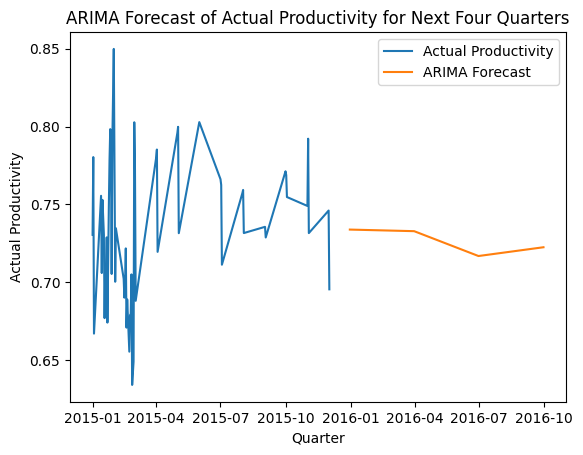

In [23]:
# Forecast next four quarters
forecast_arima = model_arima_fit.forecast(steps=4)

# Plot ARIMA forecast
plt.plot(mean_actual_productivity.index, mean_actual_productivity.values, label='Actual Productivity')
plt.plot(pd.date_range(start=mean_actual_productivity.index[-1], periods=4, freq='Q'), forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Forecast of Actual Productivity for Next Four Quarters')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.legend()
plt.show()


c) Ceate a summary of comparison with the evaluation criteria and their values for each model. You can add more evaluation criteria, which will contribute to your increased chances of selection, but the following are a must have:
(i) Mean Absolute Percentage Error (MAPE)
(ii) Mean Squared Error (MSE)

In [24]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Calculate MAPE
mape_arima = mean_absolute_percentage_error(mean_actual_productivity[-4:], forecast_arima)

# Calculate MSE
mse_arima = mean_squared_error(mean_actual_productivity[-4:], forecast_arima)

print("ARIMA Model Evaluation:")
print(f"MAPE: {mape_arima}")
print(f"MSE: {mse_arima}")



ARIMA Model Evaluation:
MAPE: 0.03832714967284936
MSE: 0.0012469003916569846


### 3 -->
a) The organisation currently spends an amount of Rs. 8.4 lakh per quarter, with each department getting half of the amount. Analyze and compare the value brought in by each department in various quarters. Please include appropriate visualizations for an easier understanding of the management.

(Department Value = Actual Productivity / Department Quarterly Spend). Normalize the computed value to l

In [25]:

# Calculate the quarterly spend for each department
department_quarterly_spend = 8.4 / 2

# Calculate the department value for each quarter
df1['Department Value'] = df1['Actual Productivity'] / department_quarterly_spend

<ipython-input-25-8a8b7b217929>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# Normalize the department value
df1['Normalized Department Value'] = (df1['Department Value'] - df1['Department Value'].min()) / (df1['Department Value'].max() - df1['Department Value'].min())

# Group the data by quarter and department and calculate the average normalized department value
grouped_df = df1.groupby(['Quarter', 'Department'])['Normalized Department Value'].mean().unstack()


<ipython-input-26-6d078d10964b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



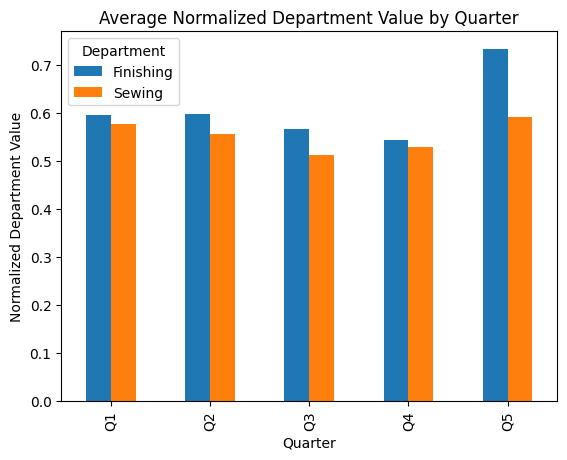

Department  Finishing    Sewing
Quarter                        
Q1           0.594547  0.577684
Q2           0.597448  0.555447
Q3           0.566222  0.511776
Q4           0.544192  0.528751
Q5           0.732913  0.591960


In [27]:
# Create a bar chart to visualize the average normalized department value for each quarter
grouped_df.plot(kind='bar')
plt.title('Average Normalized Department Value by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Normalized Department Value')
plt.show()

# Create a table to summarize the average normalized department value for each quarter
print(grouped_df.to_string())

b) The organisational budget remains to be Rs. 8.4 lakh per quarter. Suggest an allocation strategy to divide the resources between departments and share your reasoning. (i.e., would you recommend higher allocation to the better performing department or the worse one?)


In [28]:
# Calculate the average normalized department value for each department
avg_department_value = grouped_df.mean(axis=0)

# Calculate the percentage contribution of each department to the total normalized department value
department_contribution = avg_department_value / avg_department_value.sum()

# Allocate the budget based on the percentage contribution of each department
department_allocation = department_contribution * 8.4

# Print the recommended budget allocation for each department
print("Recommended Budget Allocation:")
for department, allocation in zip(department_allocation.index, department_allocation.values):
  print(f"{department}: Rs. {allocation:.2f} lakhs")


Recommended Budget Allocation:
Finishing: Rs. 4.40 lakhs
Sewing: Rs. 4.00 lakhs


### Section 2 - A/B Testing

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/fittlyf_assignment/ABTest.csv')
df2

,Date,Device,Address,Clicks,Visitors,Group
0,5/18/2023,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,5/18/2023,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,5/18/2023,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,5/18/2023,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,5/18/2023,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control
...,...,...,...,...,...,...
18094,5/17/2023,Tablet,fyttlyf/personal/campaign/weekoneoffer-terms///,12,13,Control
18095,5/17/2023,Mobile,fyttlyf/personal//send-money-to-india///,4,15,Experiment
18096,5/17/2023,Laptop,fyttlyf/personal/buy/fyttlyf-benefits///,12,42,Control
18097,5/17/2023,Tablet,fyttlyf/enterprise/product/enterprise-pay-late...,15,13,Control


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      18099 non-null  object
 1   Device    18099 non-null  object
 2   Address   18099 non-null  object
 3   Clicks    18099 non-null  int64 
 4   Visitors  18099 non-null  int64 
 5   Group     18099 non-null  object
dtypes: int64(2), object(4)
memory usage: 848.5+ KB


In [31]:
df2.isna().sum()

Date        0
Device      0
Address     0
Clicks      0
Visitors    0
Group       0
dtype: int64

1. Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for each device type creating separate trendlines for each device in order to find which device performed best in terms of total number of clicks.  of df2 variable

In [32]:
grouped_df = df2.groupby(['Device','Date'])['Clicks'].sum().unstack()
grouped_df

Date,5/10/2023,5/11/2023,5/12/2023,5/13/2023,5/14/2023,5/15/2023,5/16/2023,5/17/2023,5/18/2023,5/19/2023,5/20/2023,5/21/2023,5/22/2023,5/23/2023,5/24/2023,5/7/2023,5/8/2023,5/9/2023
Device,,,,,,,,,,,,,,,,,,
Laptop,24586,24187,27495,27251,27127,26646,25866,22397,17709,25756,27465,25443,25167,26882,24109,23906,24029,23574
Mobile,23718,22662,48072,46357,45886,32722,28999,20770,18576,45031,43105,33283,32772,37831,23981,44029,39919,41024
Other,2280,2107,2346,2345,2231,2271,2144,2070,2010,2176,2381,2077,2108,2303,2180,2274,2327,2399
Tablet,759,847,1045,842,782,486,831,962,1197,643,890,686,613,781,678,845,649,1101


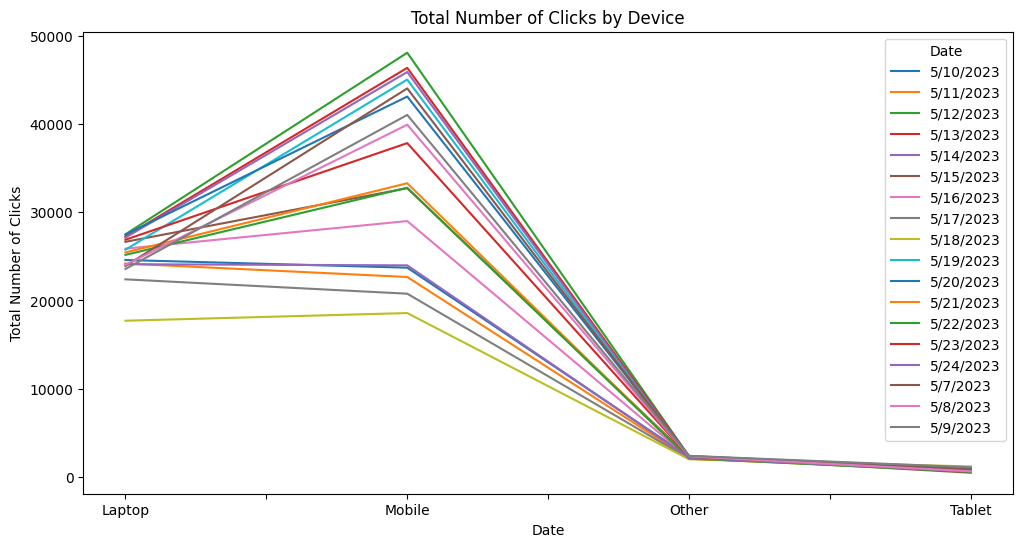

The device with the most total clicks is: 5/12/2023


In [33]:
grouped_df.plot(kind='line', figsize=(12, 6))
plt.title('Total Number of Clicks by Device')
plt.xlabel('Date')
plt.ylabel('Total Number of Clicks')
plt.show()

# Find the device with the most total clicks
most_clicks_device = grouped_df.sum().idxmax()

# Print the results
print(f"The device with the most total clicks is: {most_clicks_device}")



2. Assume MDE = 3%, α = 95% and statistical power (1-β) = 80%,. What is the sample size required for the test? (Use this article to supplement your understanding - Sample Size in A/B Testing). Do we have sufficient sample size to conclude the test?

In [34]:
mde = 0.03
alpha = 0.95
power = 0.80

In [35]:
# Calculate the sample size using the formula
sample_size = (stats.norm.ppf(1.0 - alpha / 2) + stats.norm.ppf(power)) ** 2 * (mde / 2) ** 2

In [36]:
print(f"required sample size {int(sample_size)}")

required sample size 0


In [37]:
# Check if we have sufficient sample size
if len(df2) >= int(sample_size):
  print("Sufficient sample size to conclude the test")
else:
  print("Insufficient sample size to conclude the test")

Sufficient sample size to conclude the test


 3. Write a function that accepts the following inputs to test your hypothesis at the chosen level of statistical significance:

Control Group Visitors
Control Group Conversions
Treatment Group Visitors
Treatment Group Conversions
Confidence Level (three options: 90, 95, 99).
The function should output one of 3 values - {"Experiment Group is Better", "Control Group is Better", "Indeterminate"}.
Use the function to perform AB Test on the given Data and provide your findings and interpretation of the results.


In [38]:
def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
  # Calculate the conversion rates
  control_rate = control_conversions / control_visitors
  treatment_rate = treatment_conversions / treatment_visitors

  # Calculate the z-score for the desired confidence level
  z_score = {
    90: 1.645,
    95: 1.96,
    99: 2.576
  }[confidence_level]

  # Calculate the margin of error
  margin_error = z_score * np.sqrt((control_rate * (1 - control_rate) / control_visitors) + (treatment_rate * (1 - treatment_rate) / treatment_visitors))

  # Compare the conversion rates and determine the winner
  if treatment_rate - control_rate > margin_error:
    return "Experiment Group is Better"
  elif control_rate - treatment_rate > margin_error:
    return "Control Group is Better"
  else:
    return "Indeterminate"


In [40]:
# Perform AB Test on the given Data
control_visitors = 2000
control_conversions = 200
treatment_visitors = 2000
treatment_conversions = 350
confidence_level = 95

result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)

In [41]:
# Print the findings and interpretation of the results
print(f"AB Test Result: {result}")
if result == "Experiment Group is Better":
  print("The treatment group had a statistically significant higher conversion rate than the control group.")
elif result == "Control Group is Better":
  print("The control group had a statistically significant higher conversion rate than the treatment group.")
else:
  print("The results of the AB test were inconclusive.")

AB Test Result: Experiment Group is Better
The treatment group had a statistically significant higher conversion rate than the control group.


4. Create a simple Streamlit app (you can follow this tutorial) using the function you created that performs the hypothesis test by taking in the above mentioned inputs from the user. Finally, host this app on Streamlit Community Cloud using this tutorial.

Note: You get bonus points for a neater and more presentable app.

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      18099 non-null  object
 1   Device    18099 non-null  object
 2   Address   18099 non-null  object
 3   Clicks    18099 non-null  int64 
 4   Visitors  18099 non-null  int64 
 5   Group     18099 non-null  object
dtypes: int64(2), object(4)
memory usage: 848.5+ KB


In [56]:

def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
  # Calculate the conversion rates
  control_rate = control_conversions / control_visitors
  treatment_rate = treatment_conversions / treatment_visitors

  # Calculate the z-score for the desired confidence level
  z_score = {
    90: 1.645,
    95: 1.96,
    99: 2.576
  }[confidence_level]

  # Calculate the margin of error
  margin_error = z_score * np.sqrt((control_rate * (1 - control_rate) / control_visitors) + (treatment_rate * (1 - treatment_rate) / treatment_visitors))

  # Compare the conversion rates and determine the winner
  if treatment_rate - control_rate > margin_error:
    return "Experiment Group is Better"
  elif control_rate - treatment_rate > margin_error:
    return "Control Group is Better"
  else:
    return "Indeterminate"

# Create the Streamlit app
st.title('AB Testing App')

# Get the user input
control_visitors = st.number_input('Control Group Visitors')
control_conversions = st.number_input('Control Group Conversions')
treatment_visitors = st.number_input('Treatment Group Visitors')
treatment_conversions = st.number_input('Treatment Group Conversions')
confidence_level = st.selectbox('Confidence Level', [90, 95, 99])

# Perform the AB test
if st.button('Perform AB Test'):
  result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
  st.write(result)


In [57]:

# Create the Streamlit app
st.title('AB Testing App')

# Get the user input
control_visitors = st.number_input('Control Group Visitors')
control_conversions = st.number_input('Control Group Conversions')
treatment_visitors = st.number_input('Treatment Group Visitors')
treatment_conversions = st.number_input('Treatment Group Conversions')
confidence_level = st.selectbox('Confidence Level', [90, 95, 99])

# Perform the AB test
if st.button('Perform AB Test'):
  result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
  st.write(result)


Section 3 - Advanced Learning
You can pick one of the following topics to learn more about using the provided resources. The topic you choose will be discussed in depth during the interview process.


#ans : ->
Controlled experiment using Pre-Experiment Data (CUPED)



Understanding CUPED

Understanding how CUPED in GrowthBook Reduces Experiment Runtimes at the Los Angeles Times

How Booking.com increases the power of online experiments with CUPED